# Import librairies

In [1]:
import pandas as pd, numpy as np, os, warnings, seaborn as sns
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

# Outils

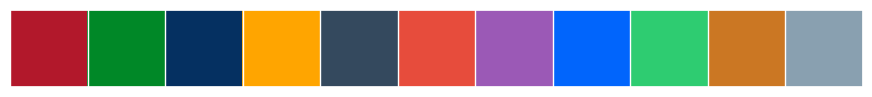

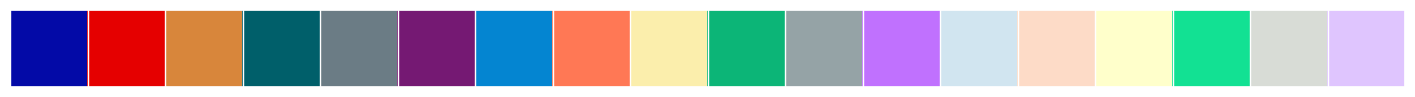

In [2]:
palette_large = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
          ]
palette = ['#b2182b','#008827','#053061','#ffa500', '#34495e', '#e74c3c', 
          '#9b59b6', '#0165fc','#2ecc71', '#cb7723', '#89a0b0']
sns.palplot(sns.color_palette(palette))
sns.palplot(sns.color_palette(palette_large))

In [3]:
repertoireRacine  = '.'
nomProjet         = 'GraphsMonoVariable-AirQuality'

repertoireProjet  = os.path.join(repertoireRacine, nomProjet)
repertoireDonnees = os.path.join(repertoireProjet, 'repertoire.donnees')
repertoireImages  = os.path.join(repertoireProjet, 'repertoire.images')


def controleExistenceRepertoire( repertoire, create_if_needed=True):
    """Voir si le répertoire existe. S'il n'existe pas il est créé."""
    path_exists = os.path.exists(repertoire)
    if path_exists:
        if not os.path.isdir(repertoire):
            raise Exception("Trouvé le nom  "+repertoire +" mais c'est un fichier, pas un répertoire")
            # return False
        return True
    if create_if_needed:
        os.makedirs(repertoire)

def sauvegarderImage( fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    plt.savefig(os.path.join(repertoireImages,
                             fichier+f"--{dt.now().strftime('%Y_%m_%d_%H.%M.%S')}.png"), 
                             dpi=600, 
                             bbox_inches='tight')

def sauvegarderImageSNS( sns_plot, fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    fig = sns_plot.get_figure()
    fig.savefig(os.path.join(repertoireImages,fichier+'.png'))
    
controleExistenceRepertoire(repertoireProjet);
controleExistenceRepertoire(repertoireDonnees);
controleExistenceRepertoire(repertoireImages);

In [4]:
donnees = pd.read_csv("../donnees/AirQualityUCI01.csv",usecols=['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']).dropna()
donnees.columns  = [ str(x).replace('.','_').replace('(','_').replace(')','') for x  in donnees.columns ]
donnees["Date"] = pd.to_datetime(donnees["Date"]+donnees["Time"], format='%d/%m/%Y%H.%M.%S')
donnees.drop(columns='Time',inplace=True)
donnees.set_index('Date',inplace=True)
donnees.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
Date,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [5]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO_GT         9357 non-null   float64
 1   PT08_S1_CO    9357 non-null   float64
 2   NMHC_GT       9357 non-null   float64
 3   C6H6_GT       9357 non-null   float64
 4   PT08_S2_NMHC  9357 non-null   float64
 5   NOx_GT        9357 non-null   float64
 6   PT08_S3_NOx   9357 non-null   float64
 7   NO2_GT        9357 non-null   float64
 8   PT08_S4_NO2   9357 non-null   float64
 9   PT08_S5_O3    9357 non-null   float64
 10  T             9357 non-null   float64
 11  RH            9357 non-null   float64
 12  AH            9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


In [6]:
donnees.isnull().sum()

CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
NOx_GT          0
PT08_S3_NOx     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
dtype: int64

In [7]:
donnees.replace(to_replace=-200,value=None,inplace=True)

In [8]:
donnees = donnees.astype('float32')

In [9]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO_GT         7674 non-null   float32
 1   PT08_S1_CO    8991 non-null   float32
 2   NMHC_GT       914 non-null    float32
 3   C6H6_GT       8991 non-null   float32
 4   PT08_S2_NMHC  8991 non-null   float32
 5   NOx_GT        7718 non-null   float32
 6   PT08_S3_NOx   8991 non-null   float32
 7   NO2_GT        7715 non-null   float32
 8   PT08_S4_NO2   8991 non-null   float32
 9   PT08_S5_O3    8991 non-null   float32
 10  T             8991 non-null   float32
 11  RH            8991 non-null   float32
 12  AH            8991 non-null   float32
dtypes: float32(13)
memory usage: 548.3 KB


In [10]:
donnees.isnull().sum()

CO_GT           1683
PT08_S1_CO       366
NMHC_GT         8443
C6H6_GT          366
PT08_S2_NMHC     366
NOx_GT          1639
PT08_S3_NOx      366
NO2_GT          1642
PT08_S4_NO2      366
PT08_S5_O3       366
T                366
RH               366
AH               366
dtype: int64

# Histogramme

<img src="https://raw.githubusercontent.com/rbizoi/PythonFormation/refs/heads/main/images/hist03.png" width="850">

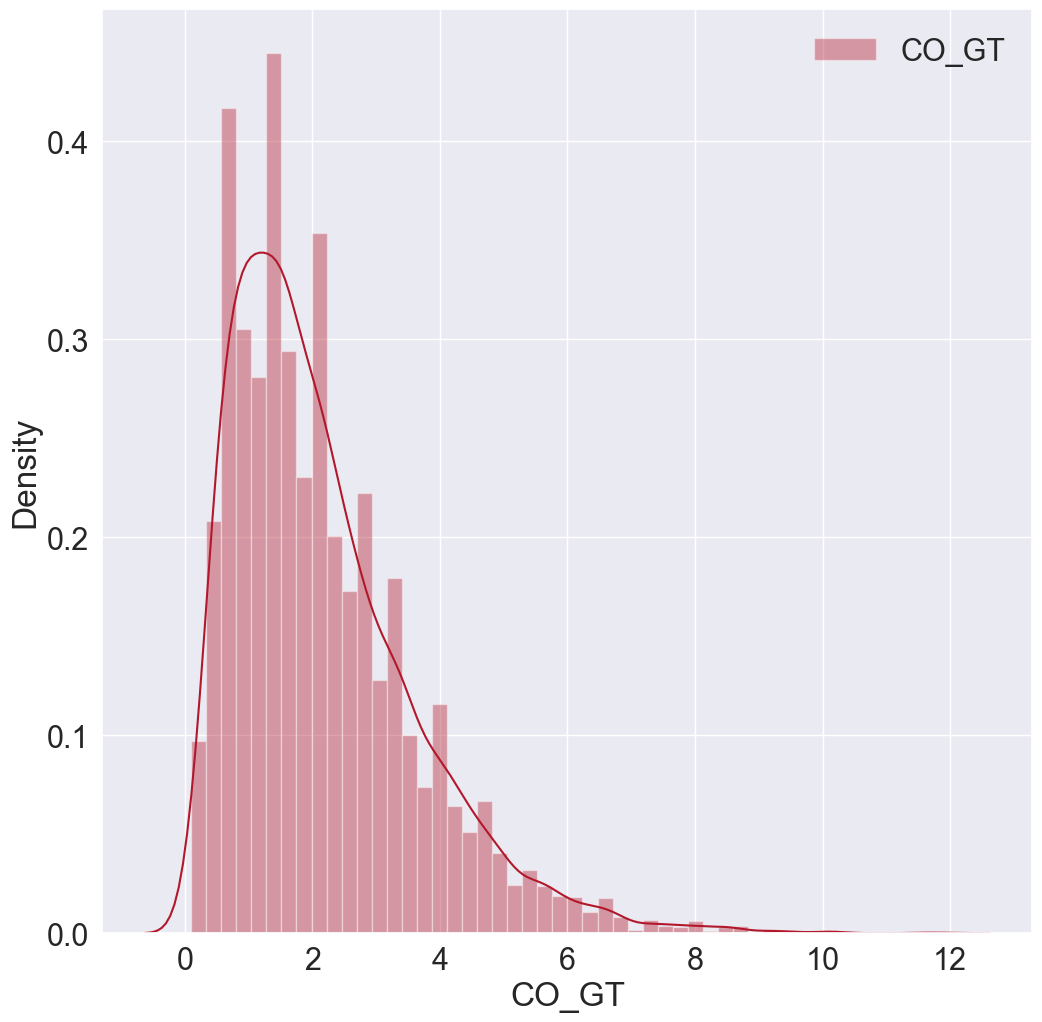

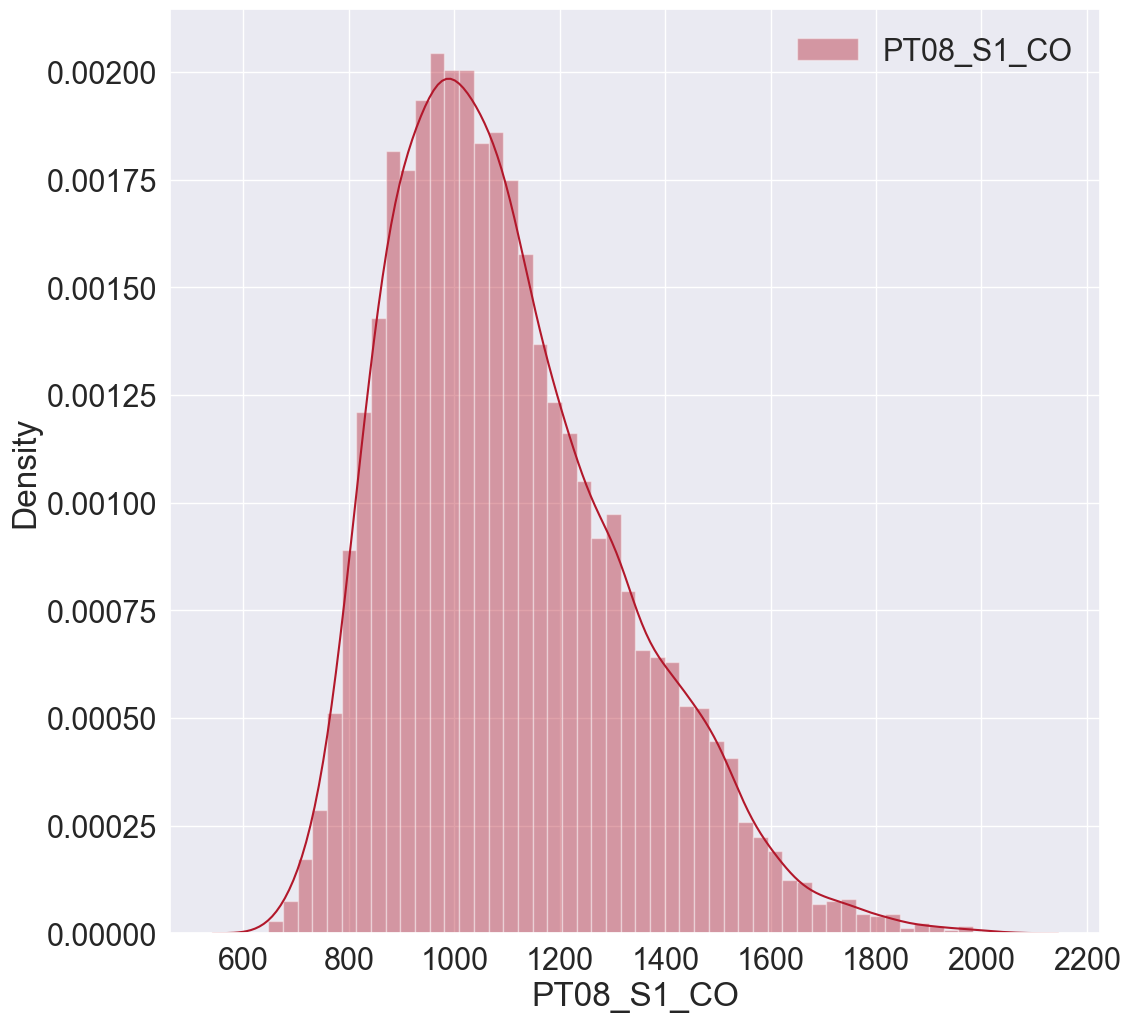

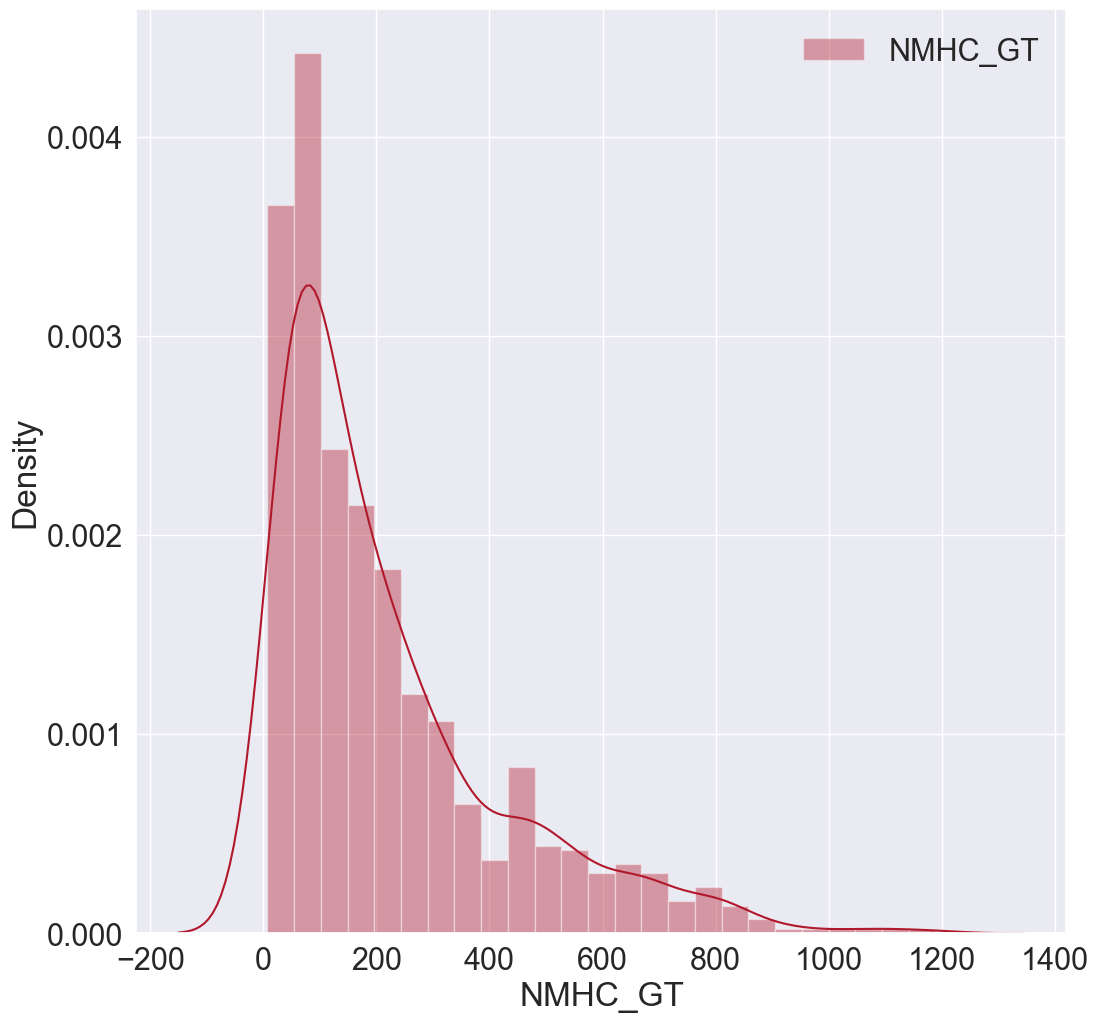

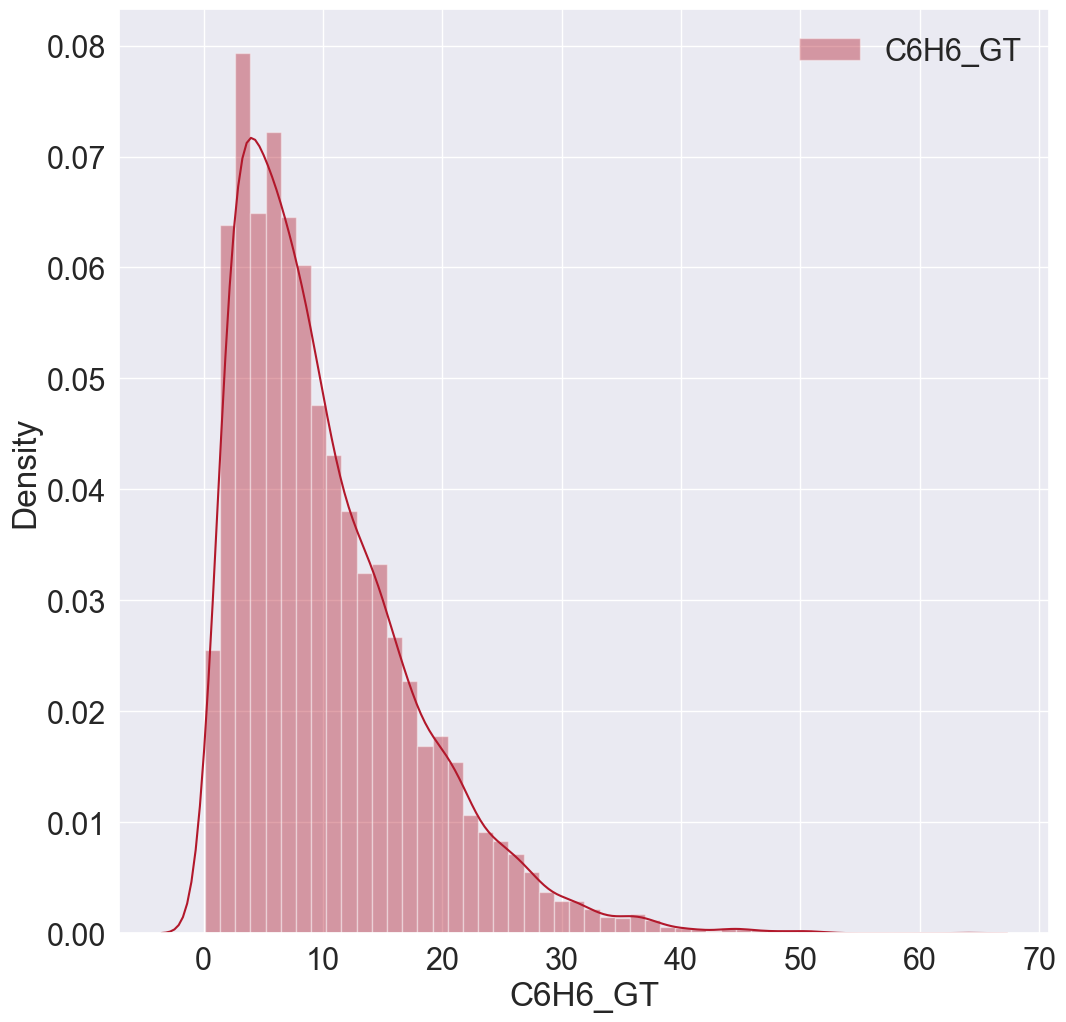

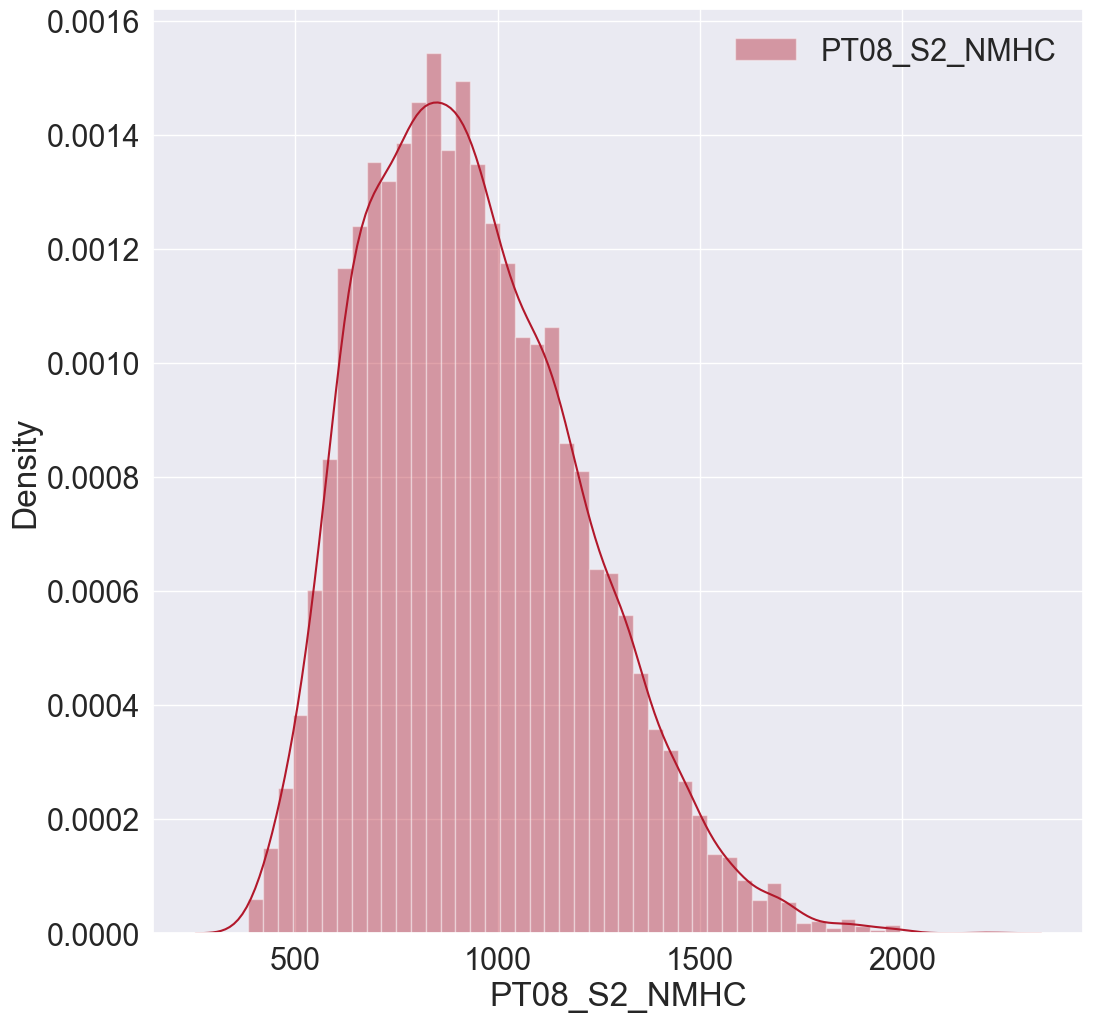

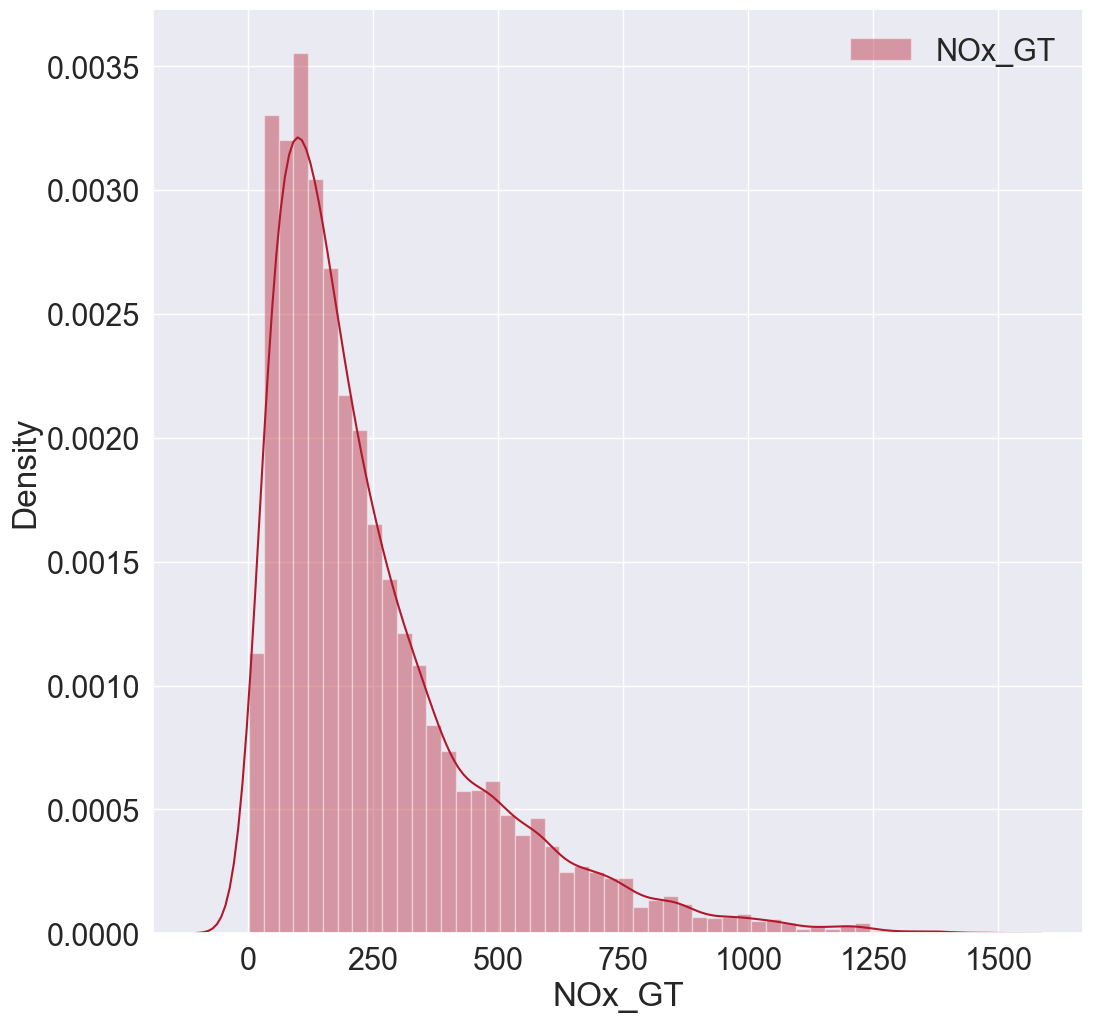

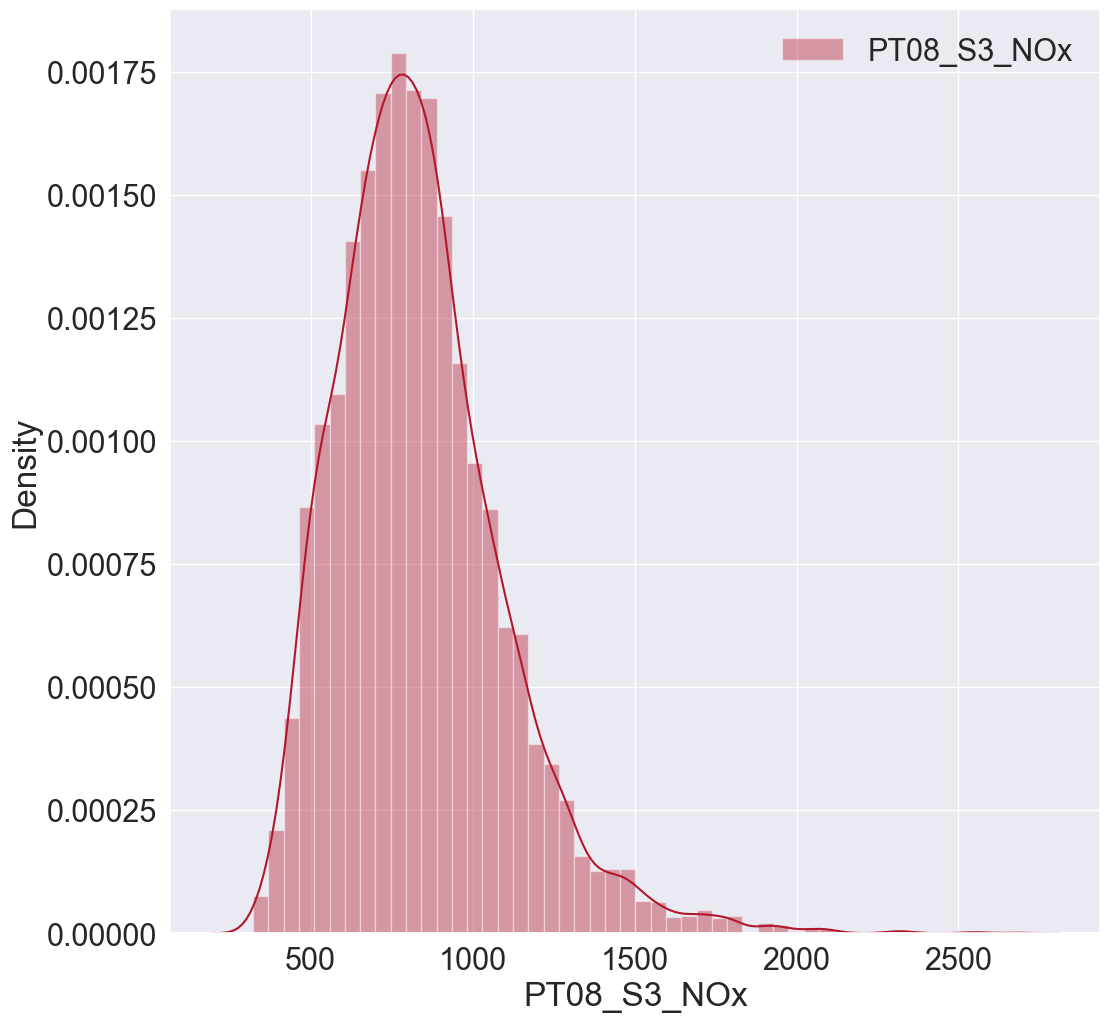

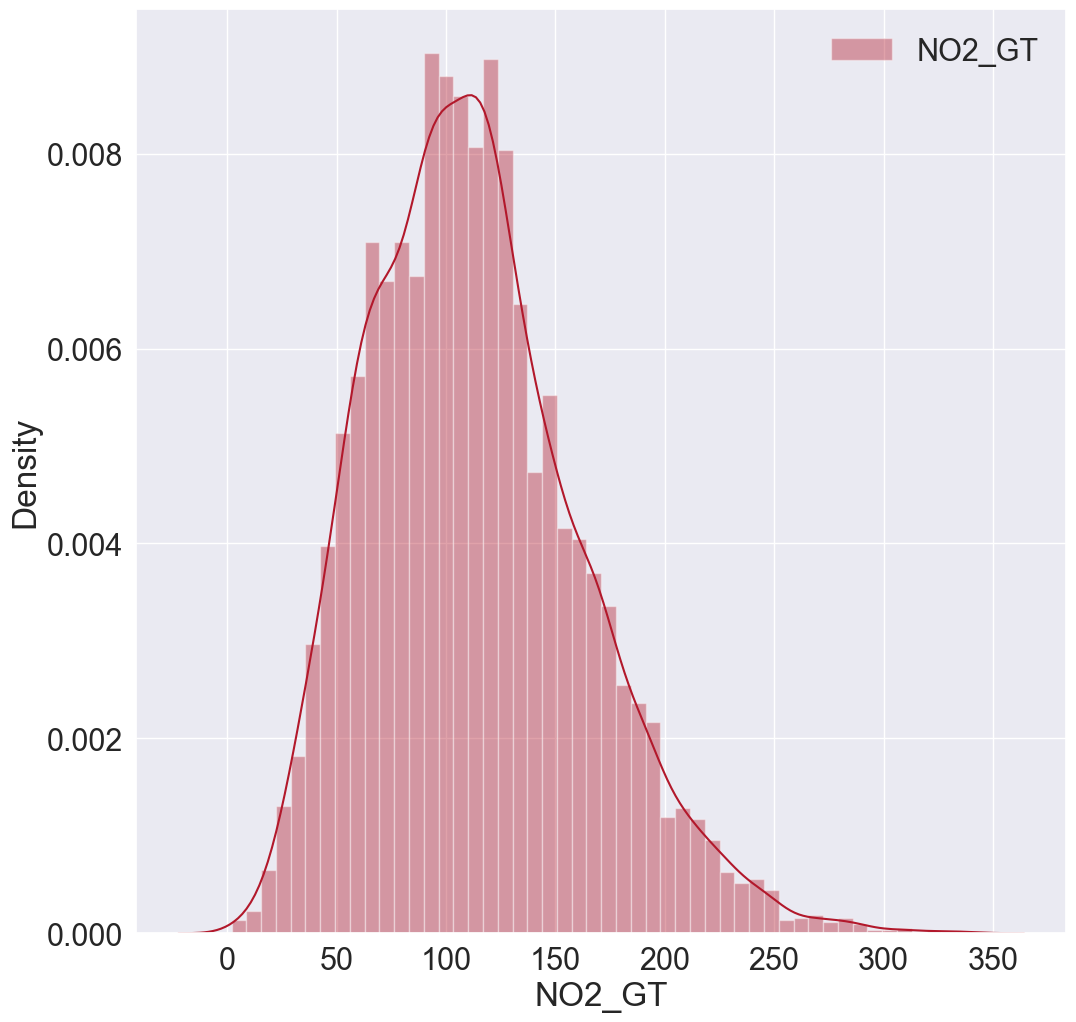

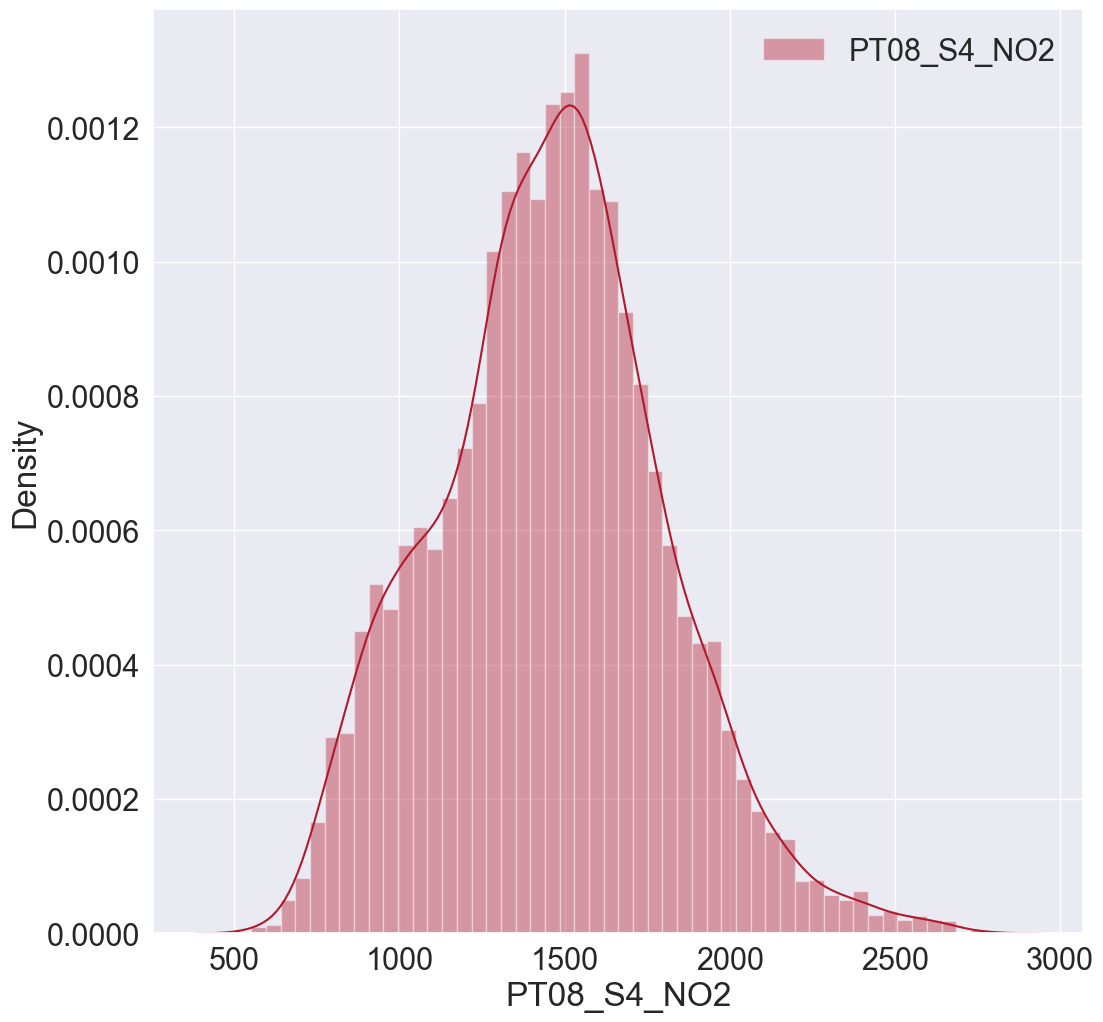

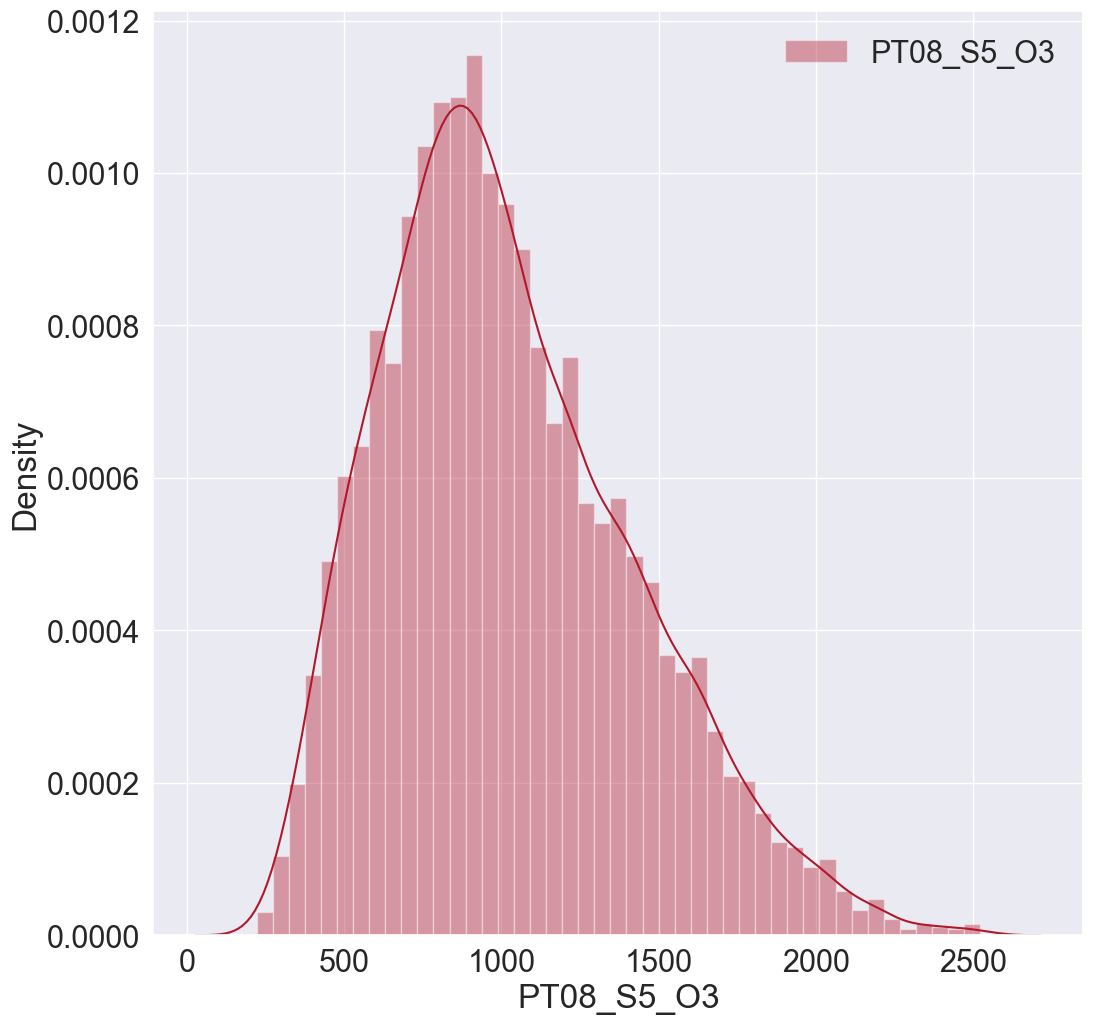

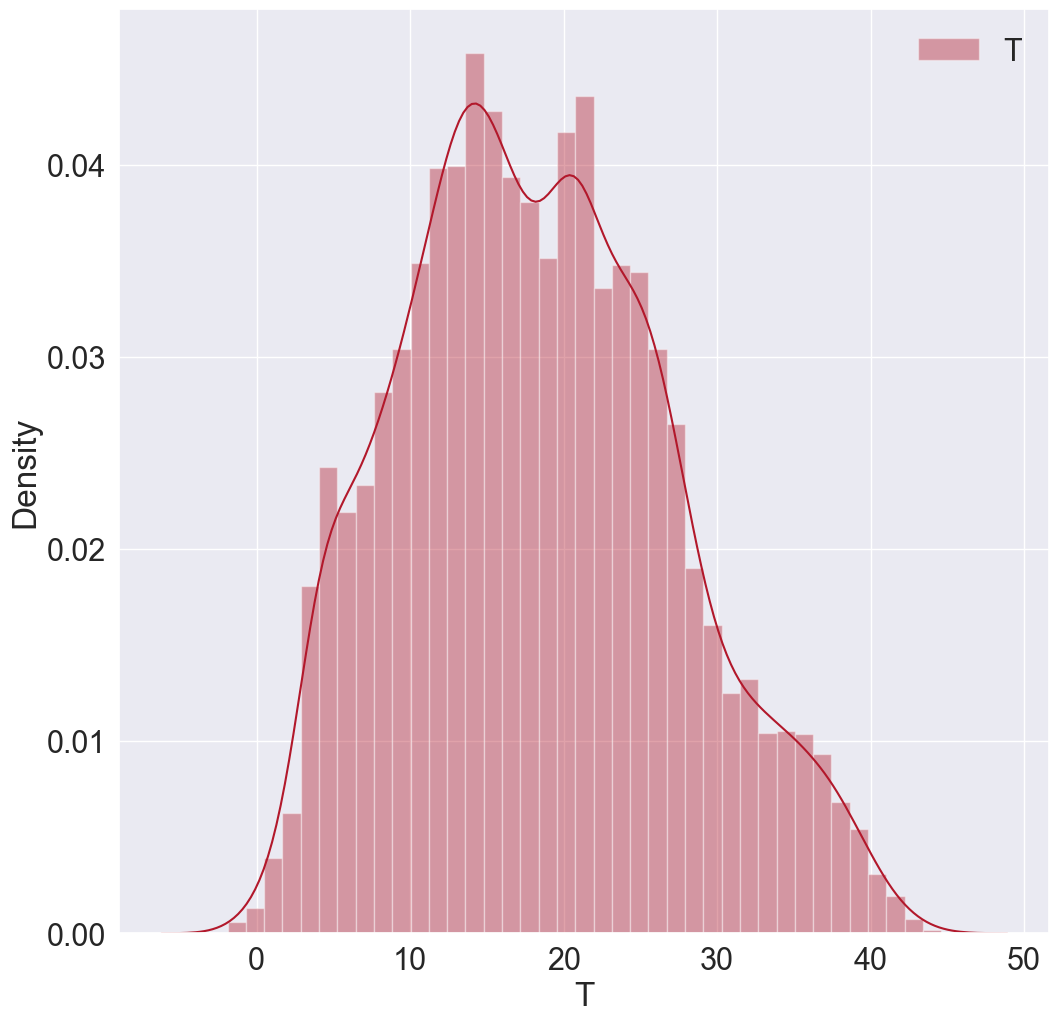

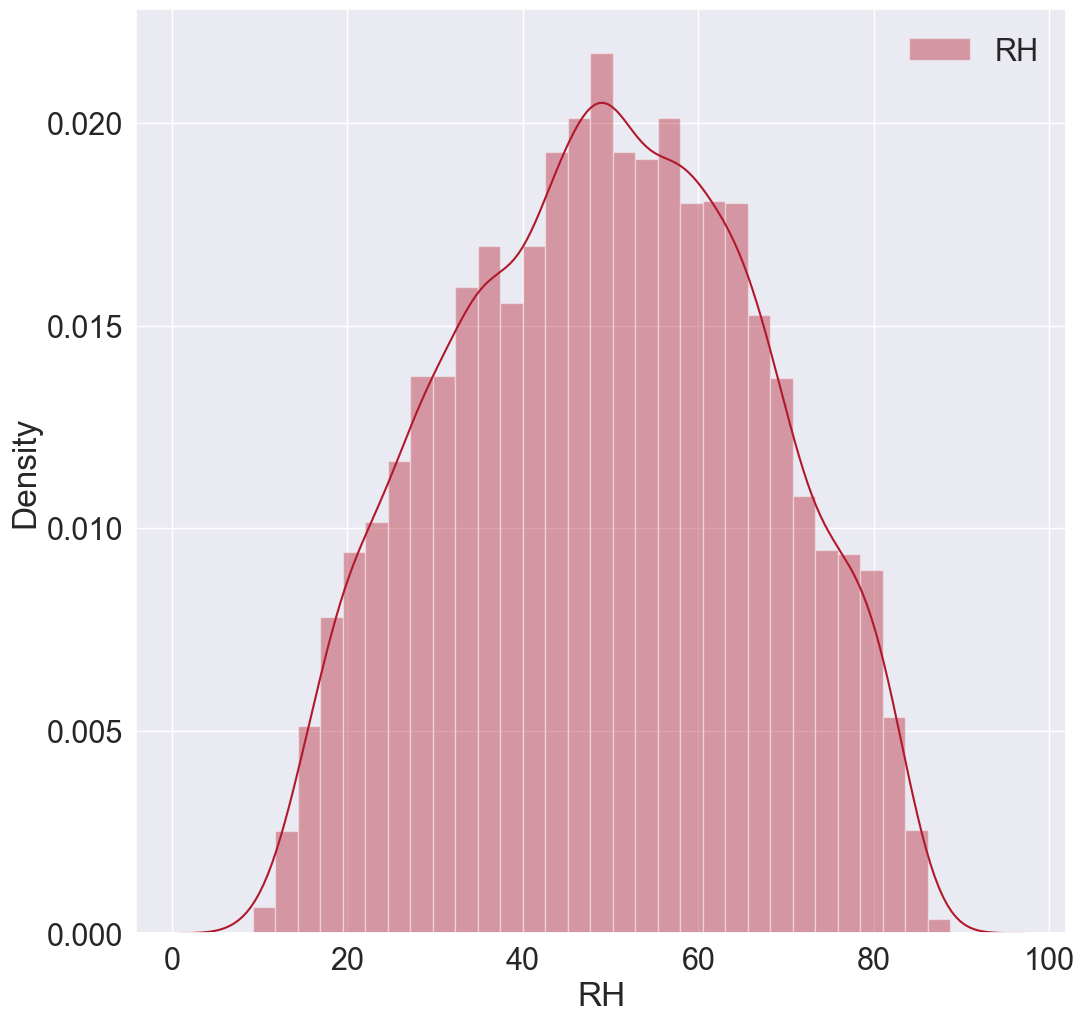

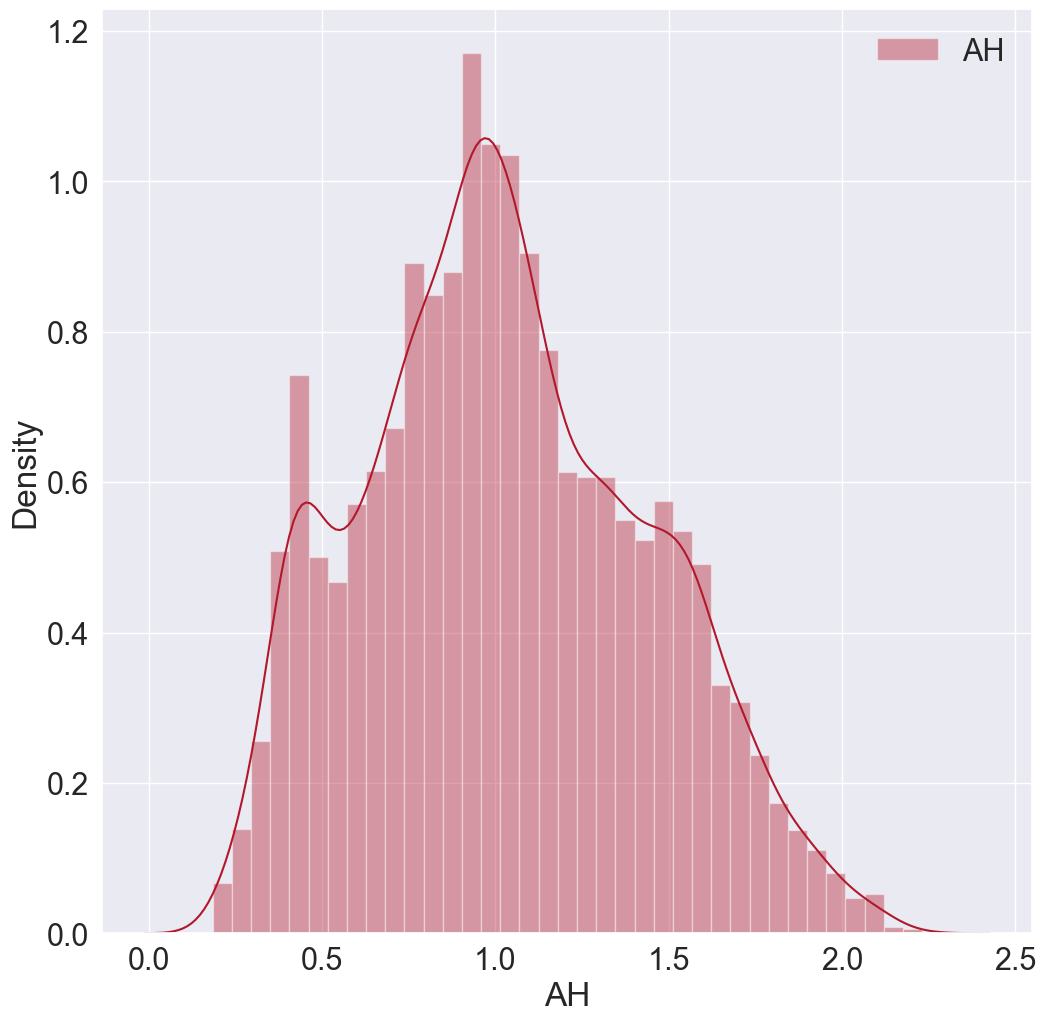

In [11]:
for colonne in donnees.columns:
    plt.figure(figsize=(12,12))
    sns.distplot(donnees[colonne], color=palette[0], label=colonne)
    plt.legend();
    # sauvegarderImage( f'hist_{colonne}')

# BoxPlot

<img src="https://raw.githubusercontent.com/rbizoi/PythonFormation/refs/heads/main/images/boxplot.png" width="850">

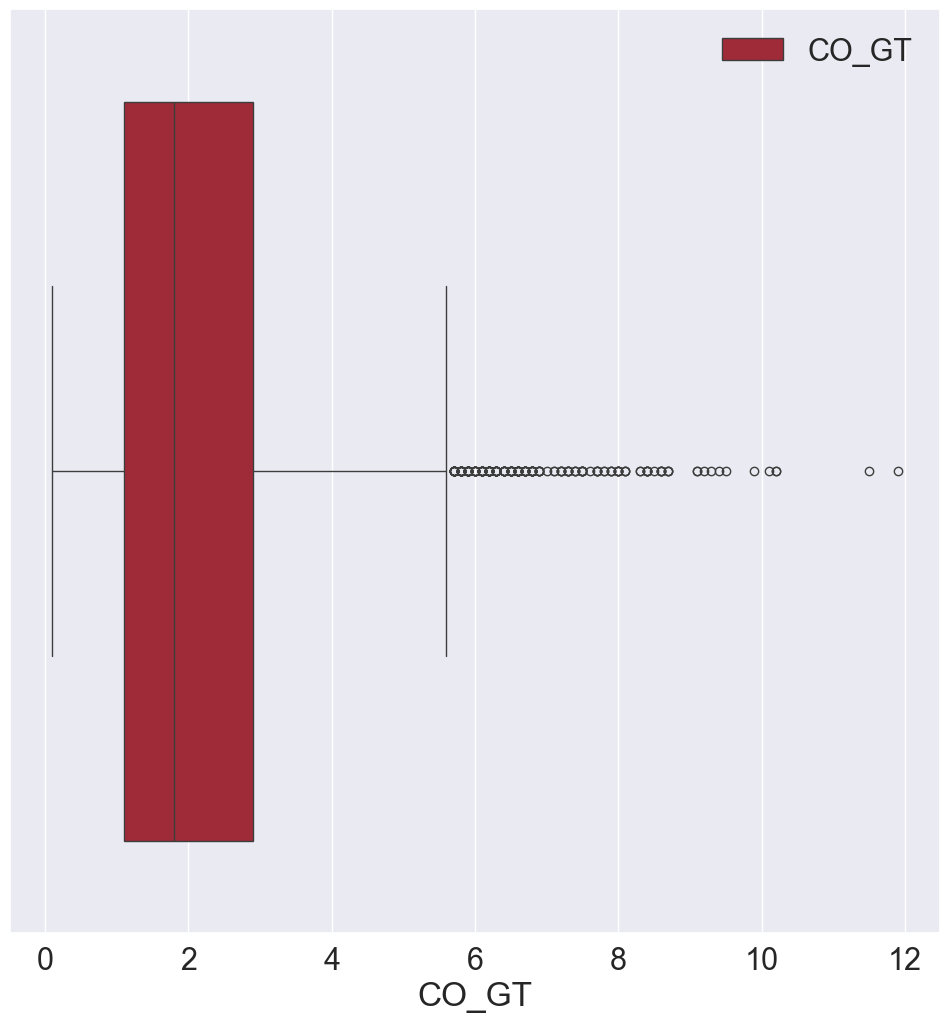

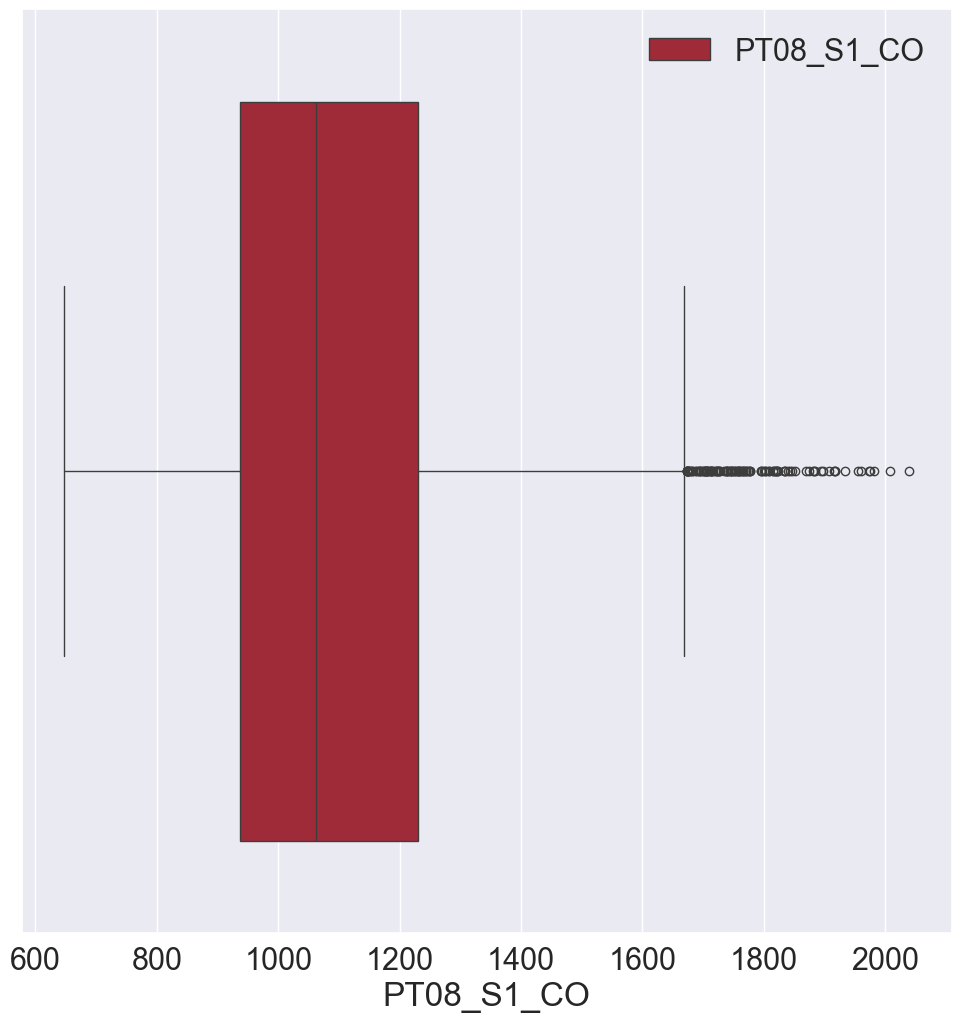

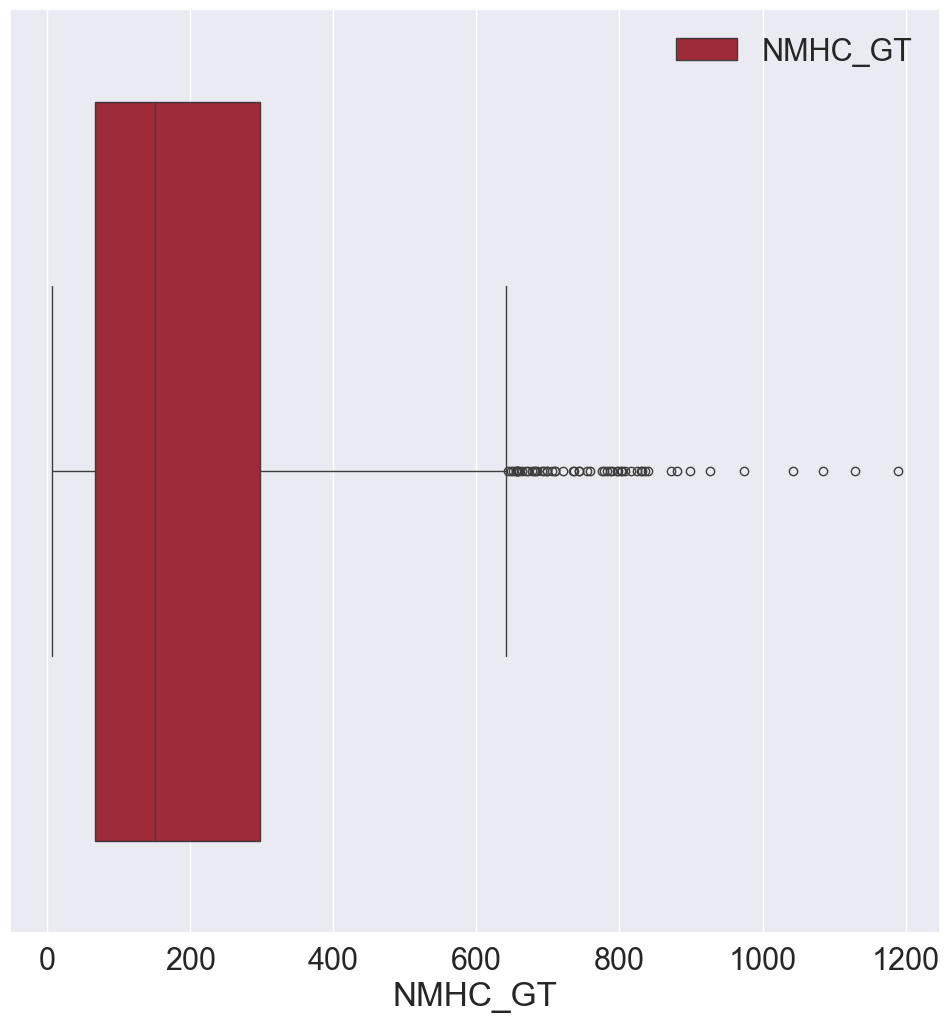

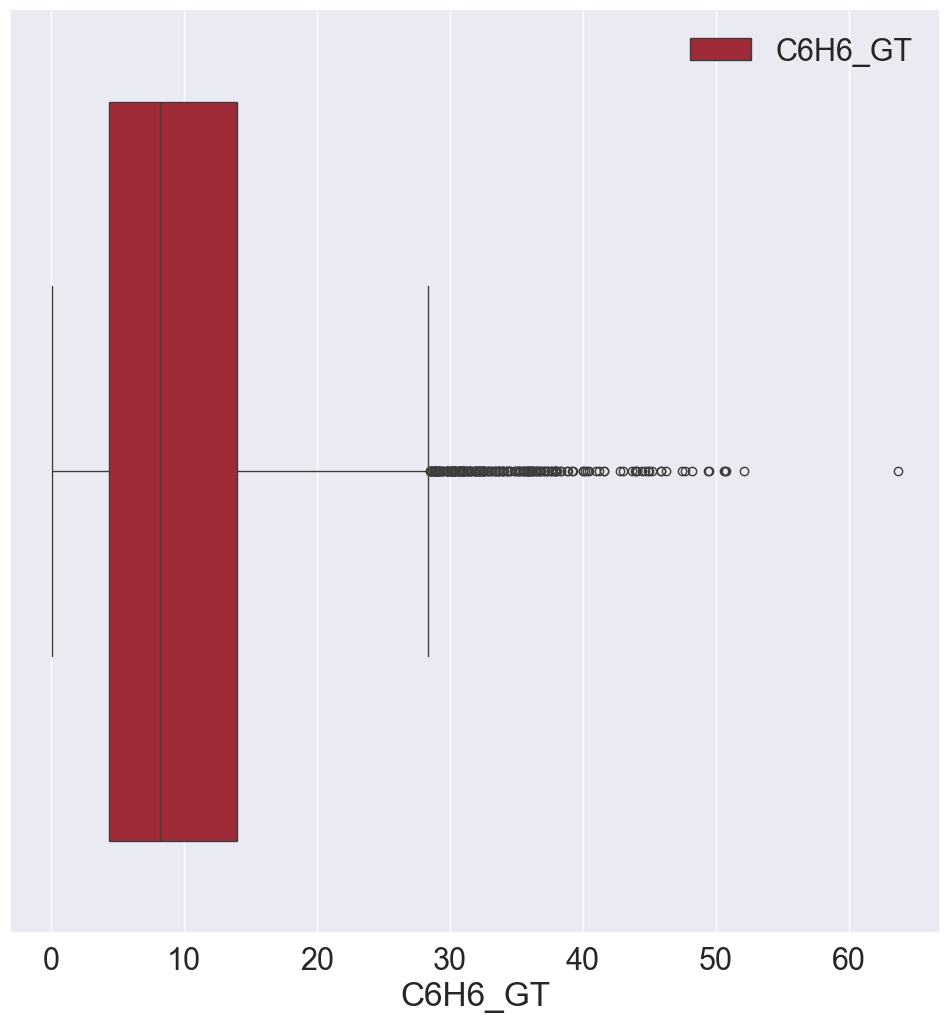

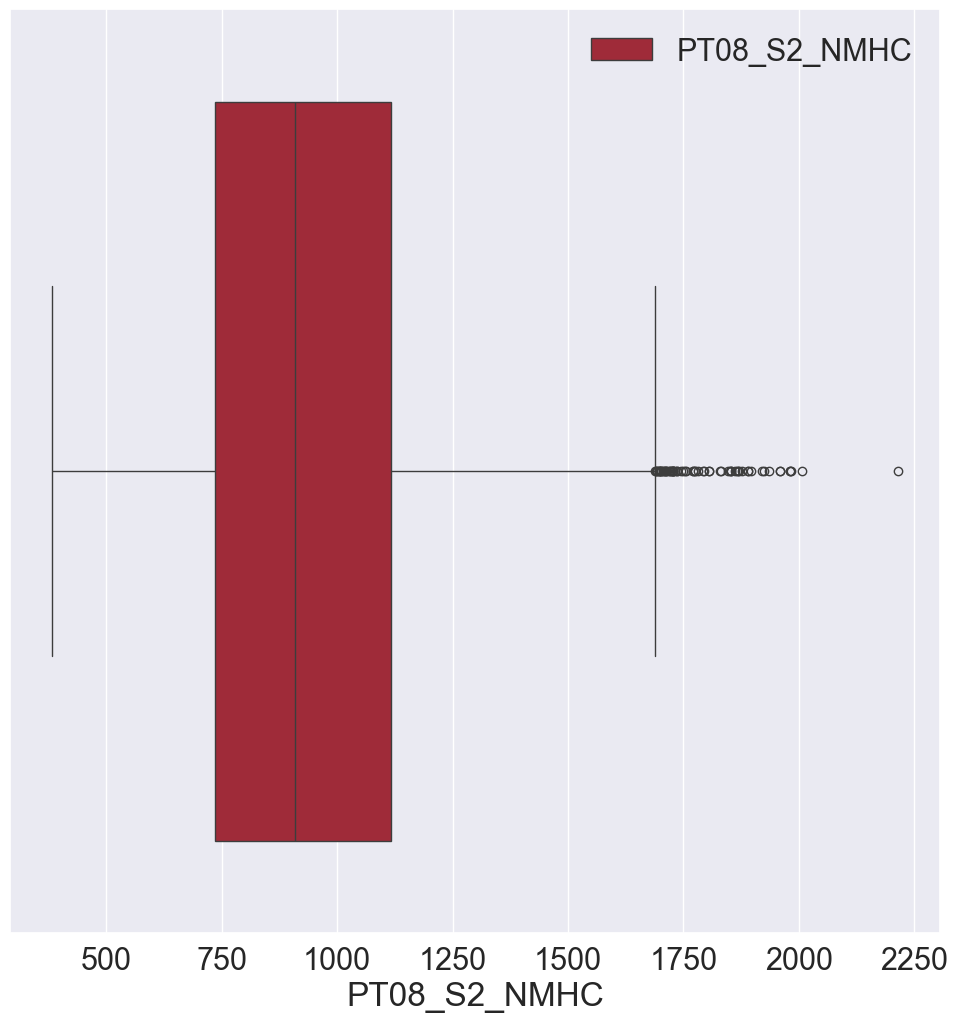

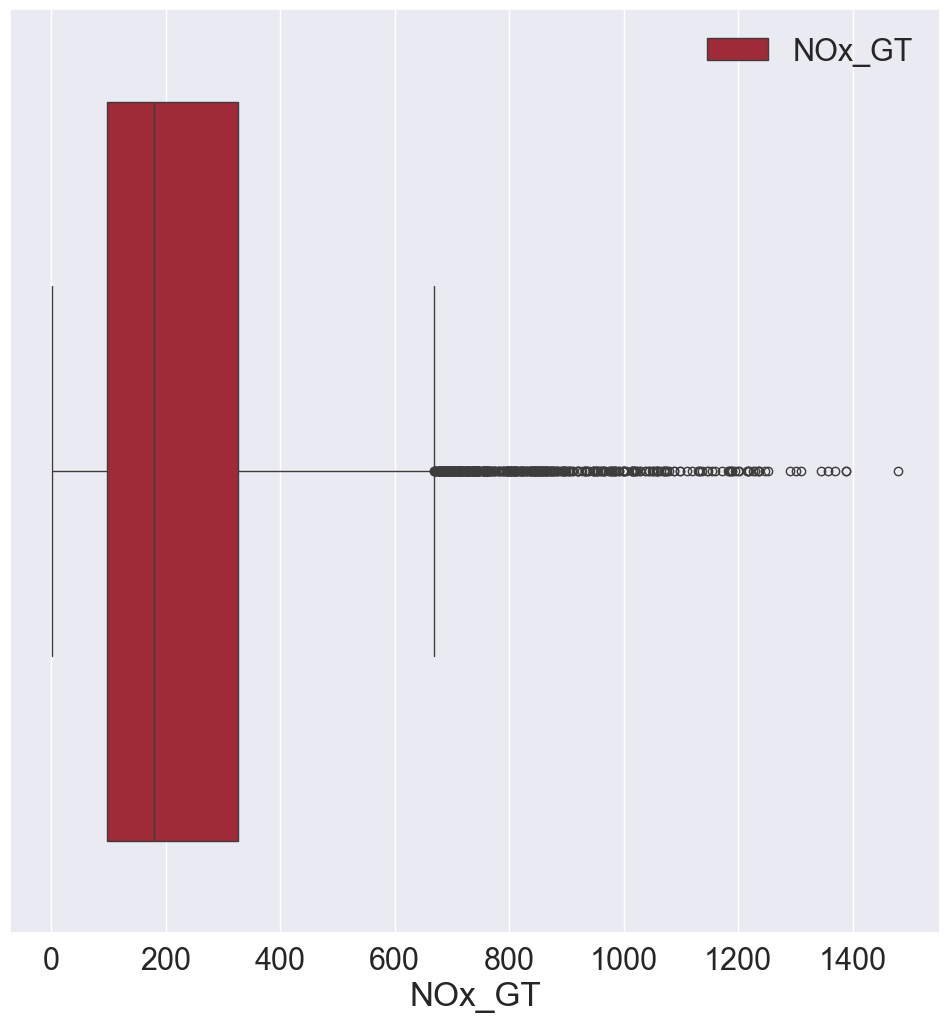

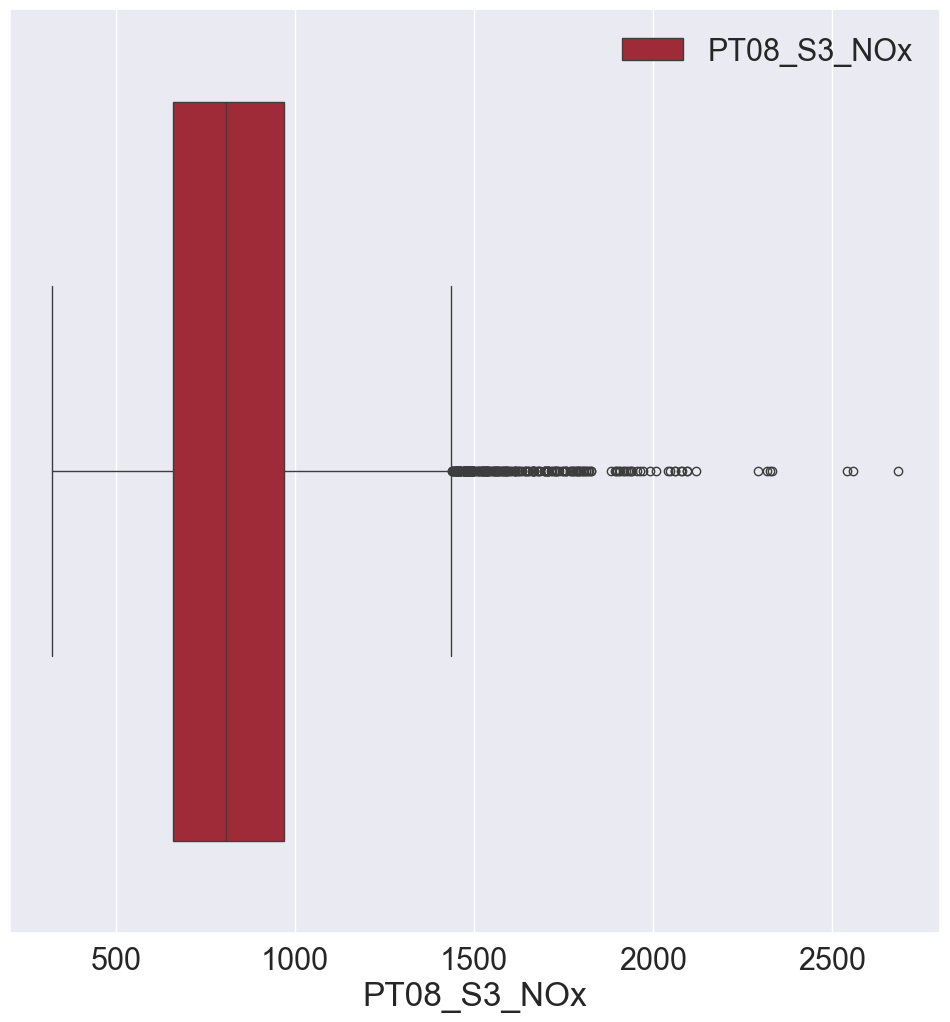

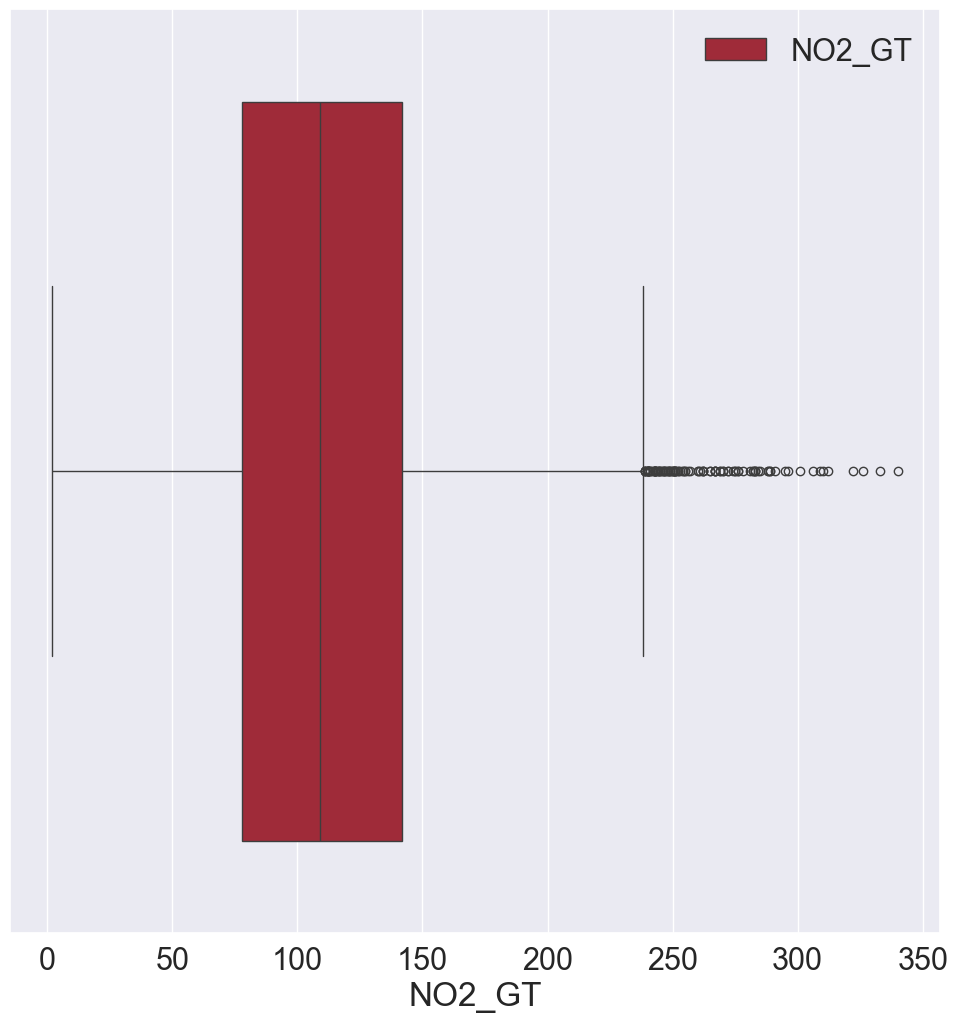

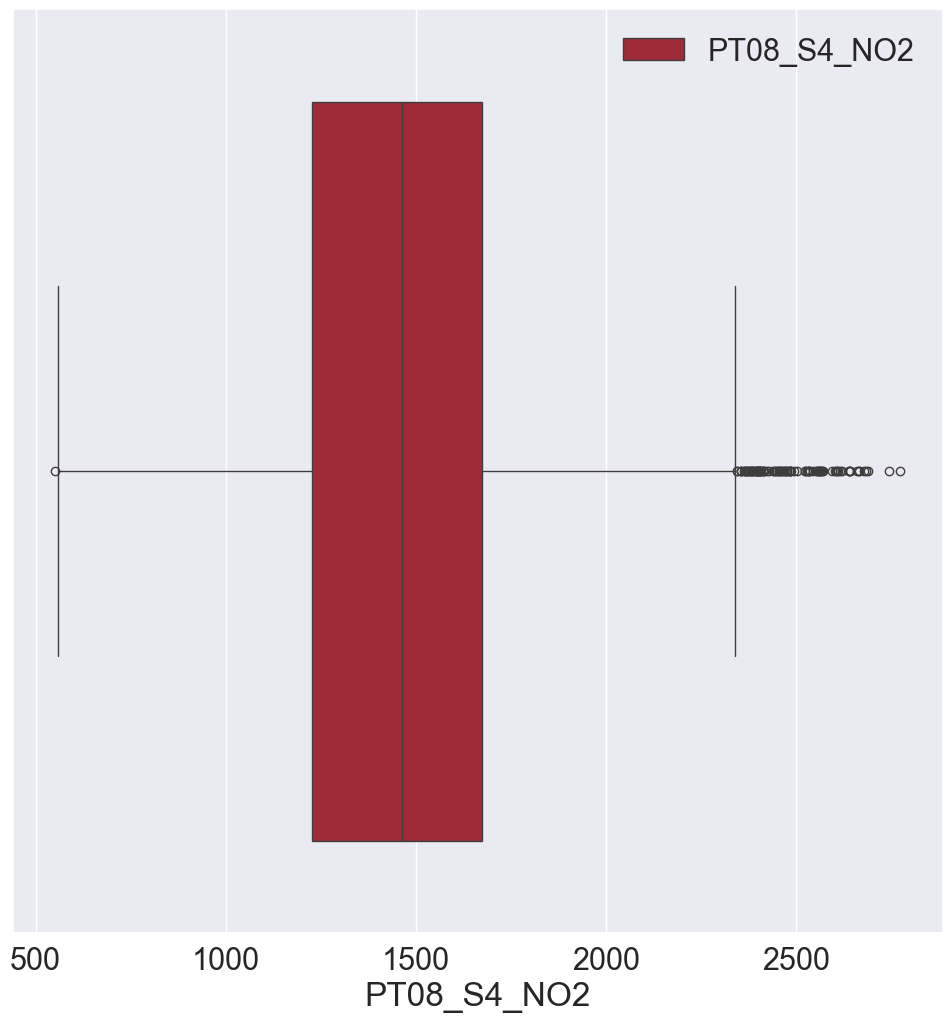

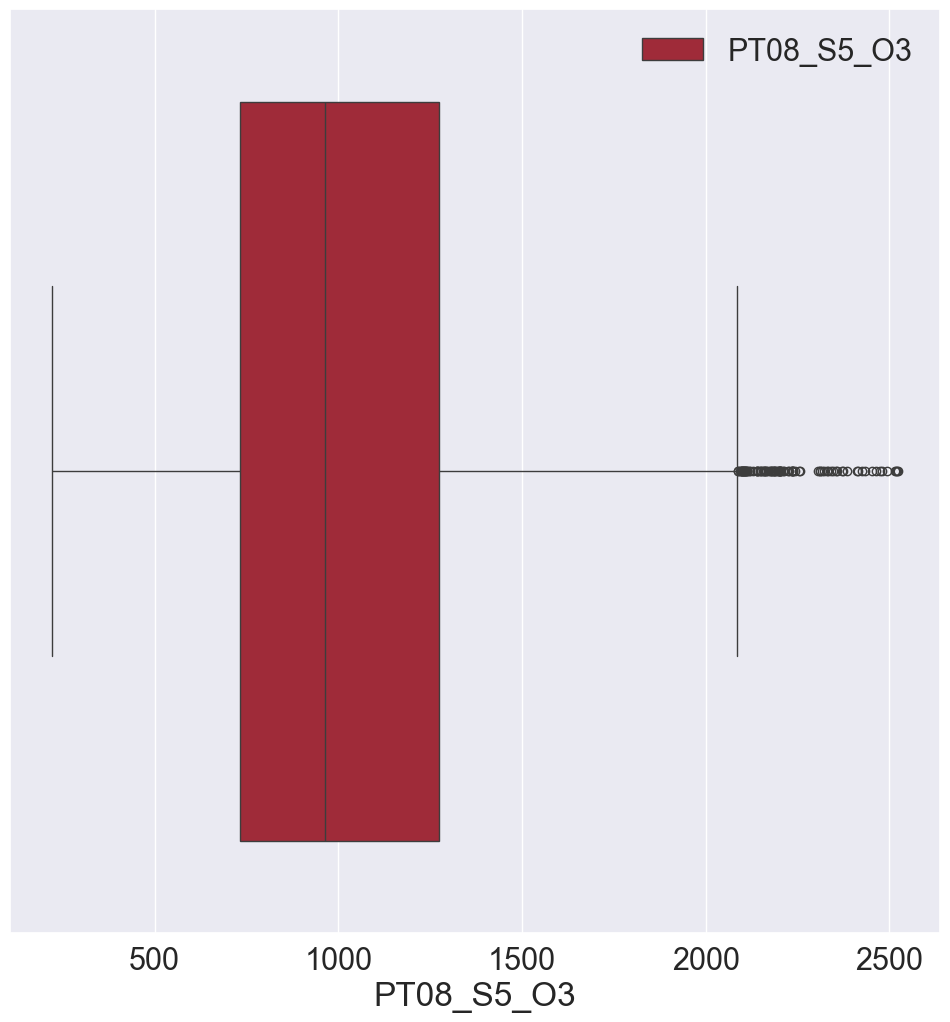

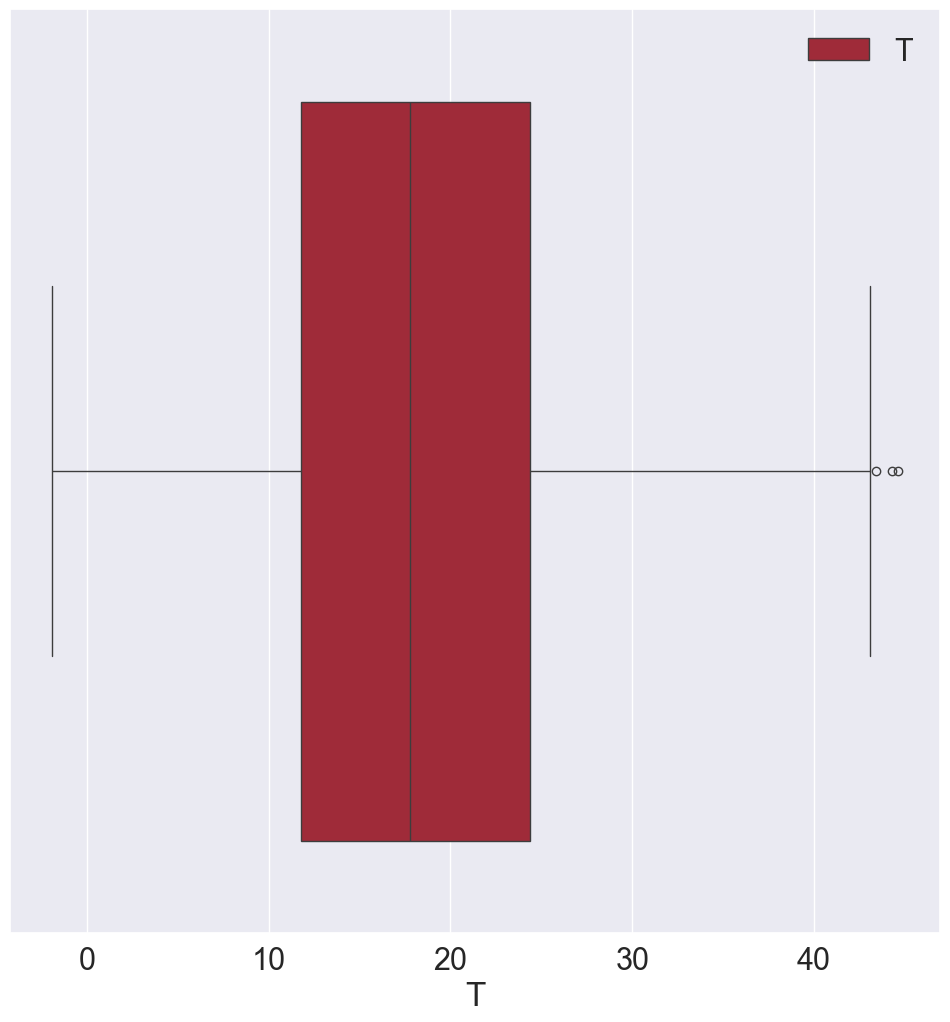

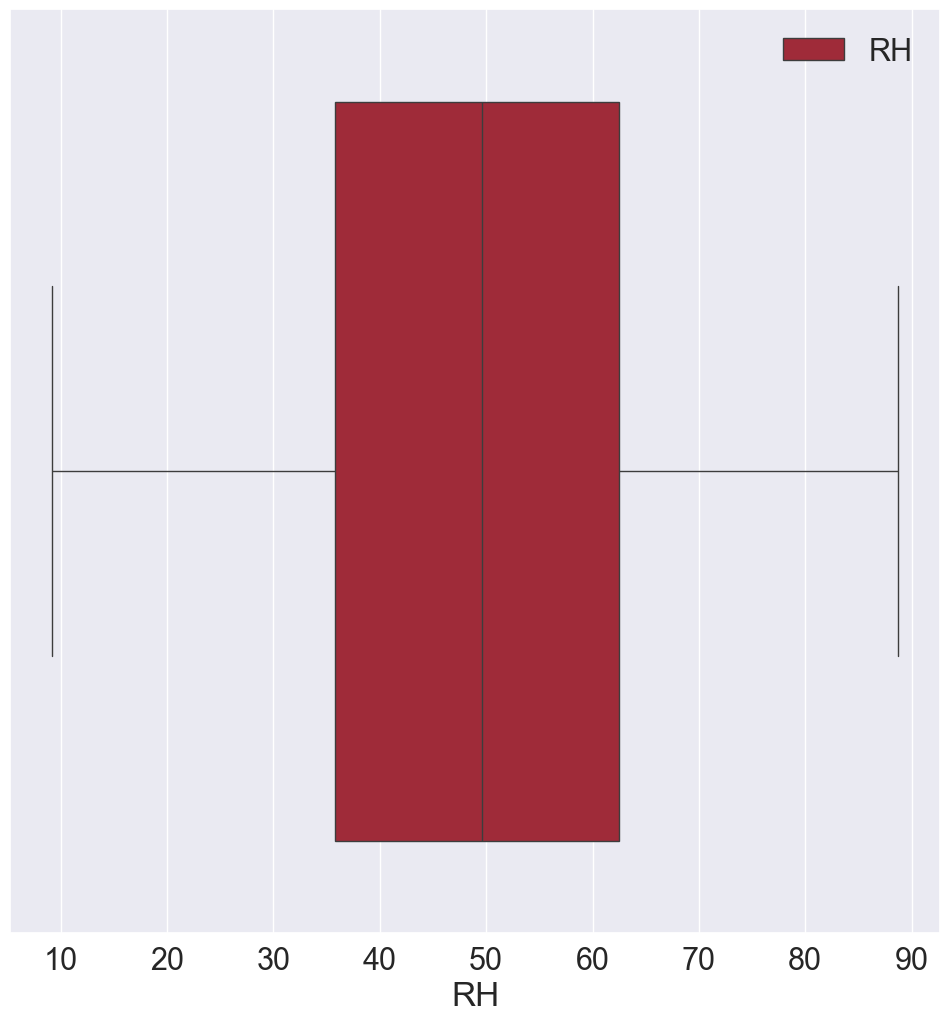

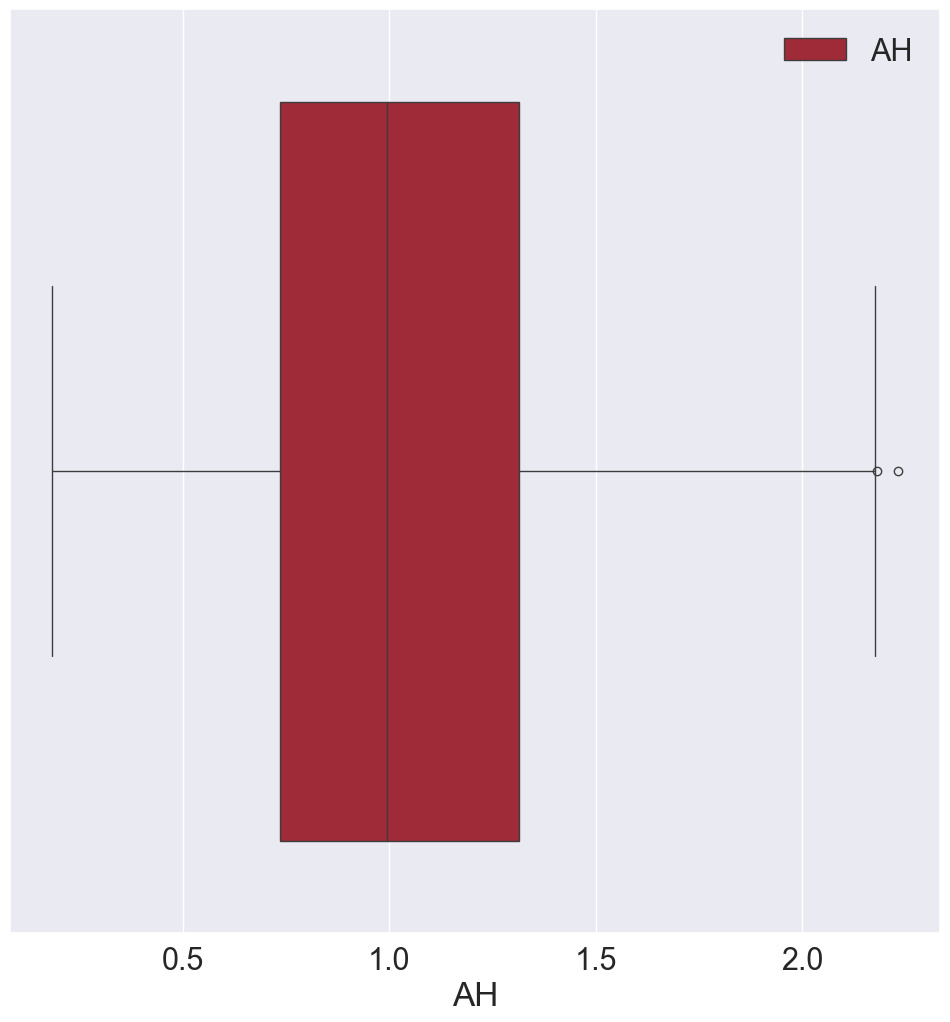

In [12]:
for colonne in donnees.columns:
    plt.figure(figsize=(12,12))
    sns.boxplot(donnees[colonne], orient='h', color=palette[0], label=colonne)
    plt.legend();
    # sauvegarderImage( f'boxplot_{colonne}')

In [13]:
donnees.columns

Index(['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC', 'NOx_GT',
       'PT08_S3_NOx', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH'],
      dtype='object')

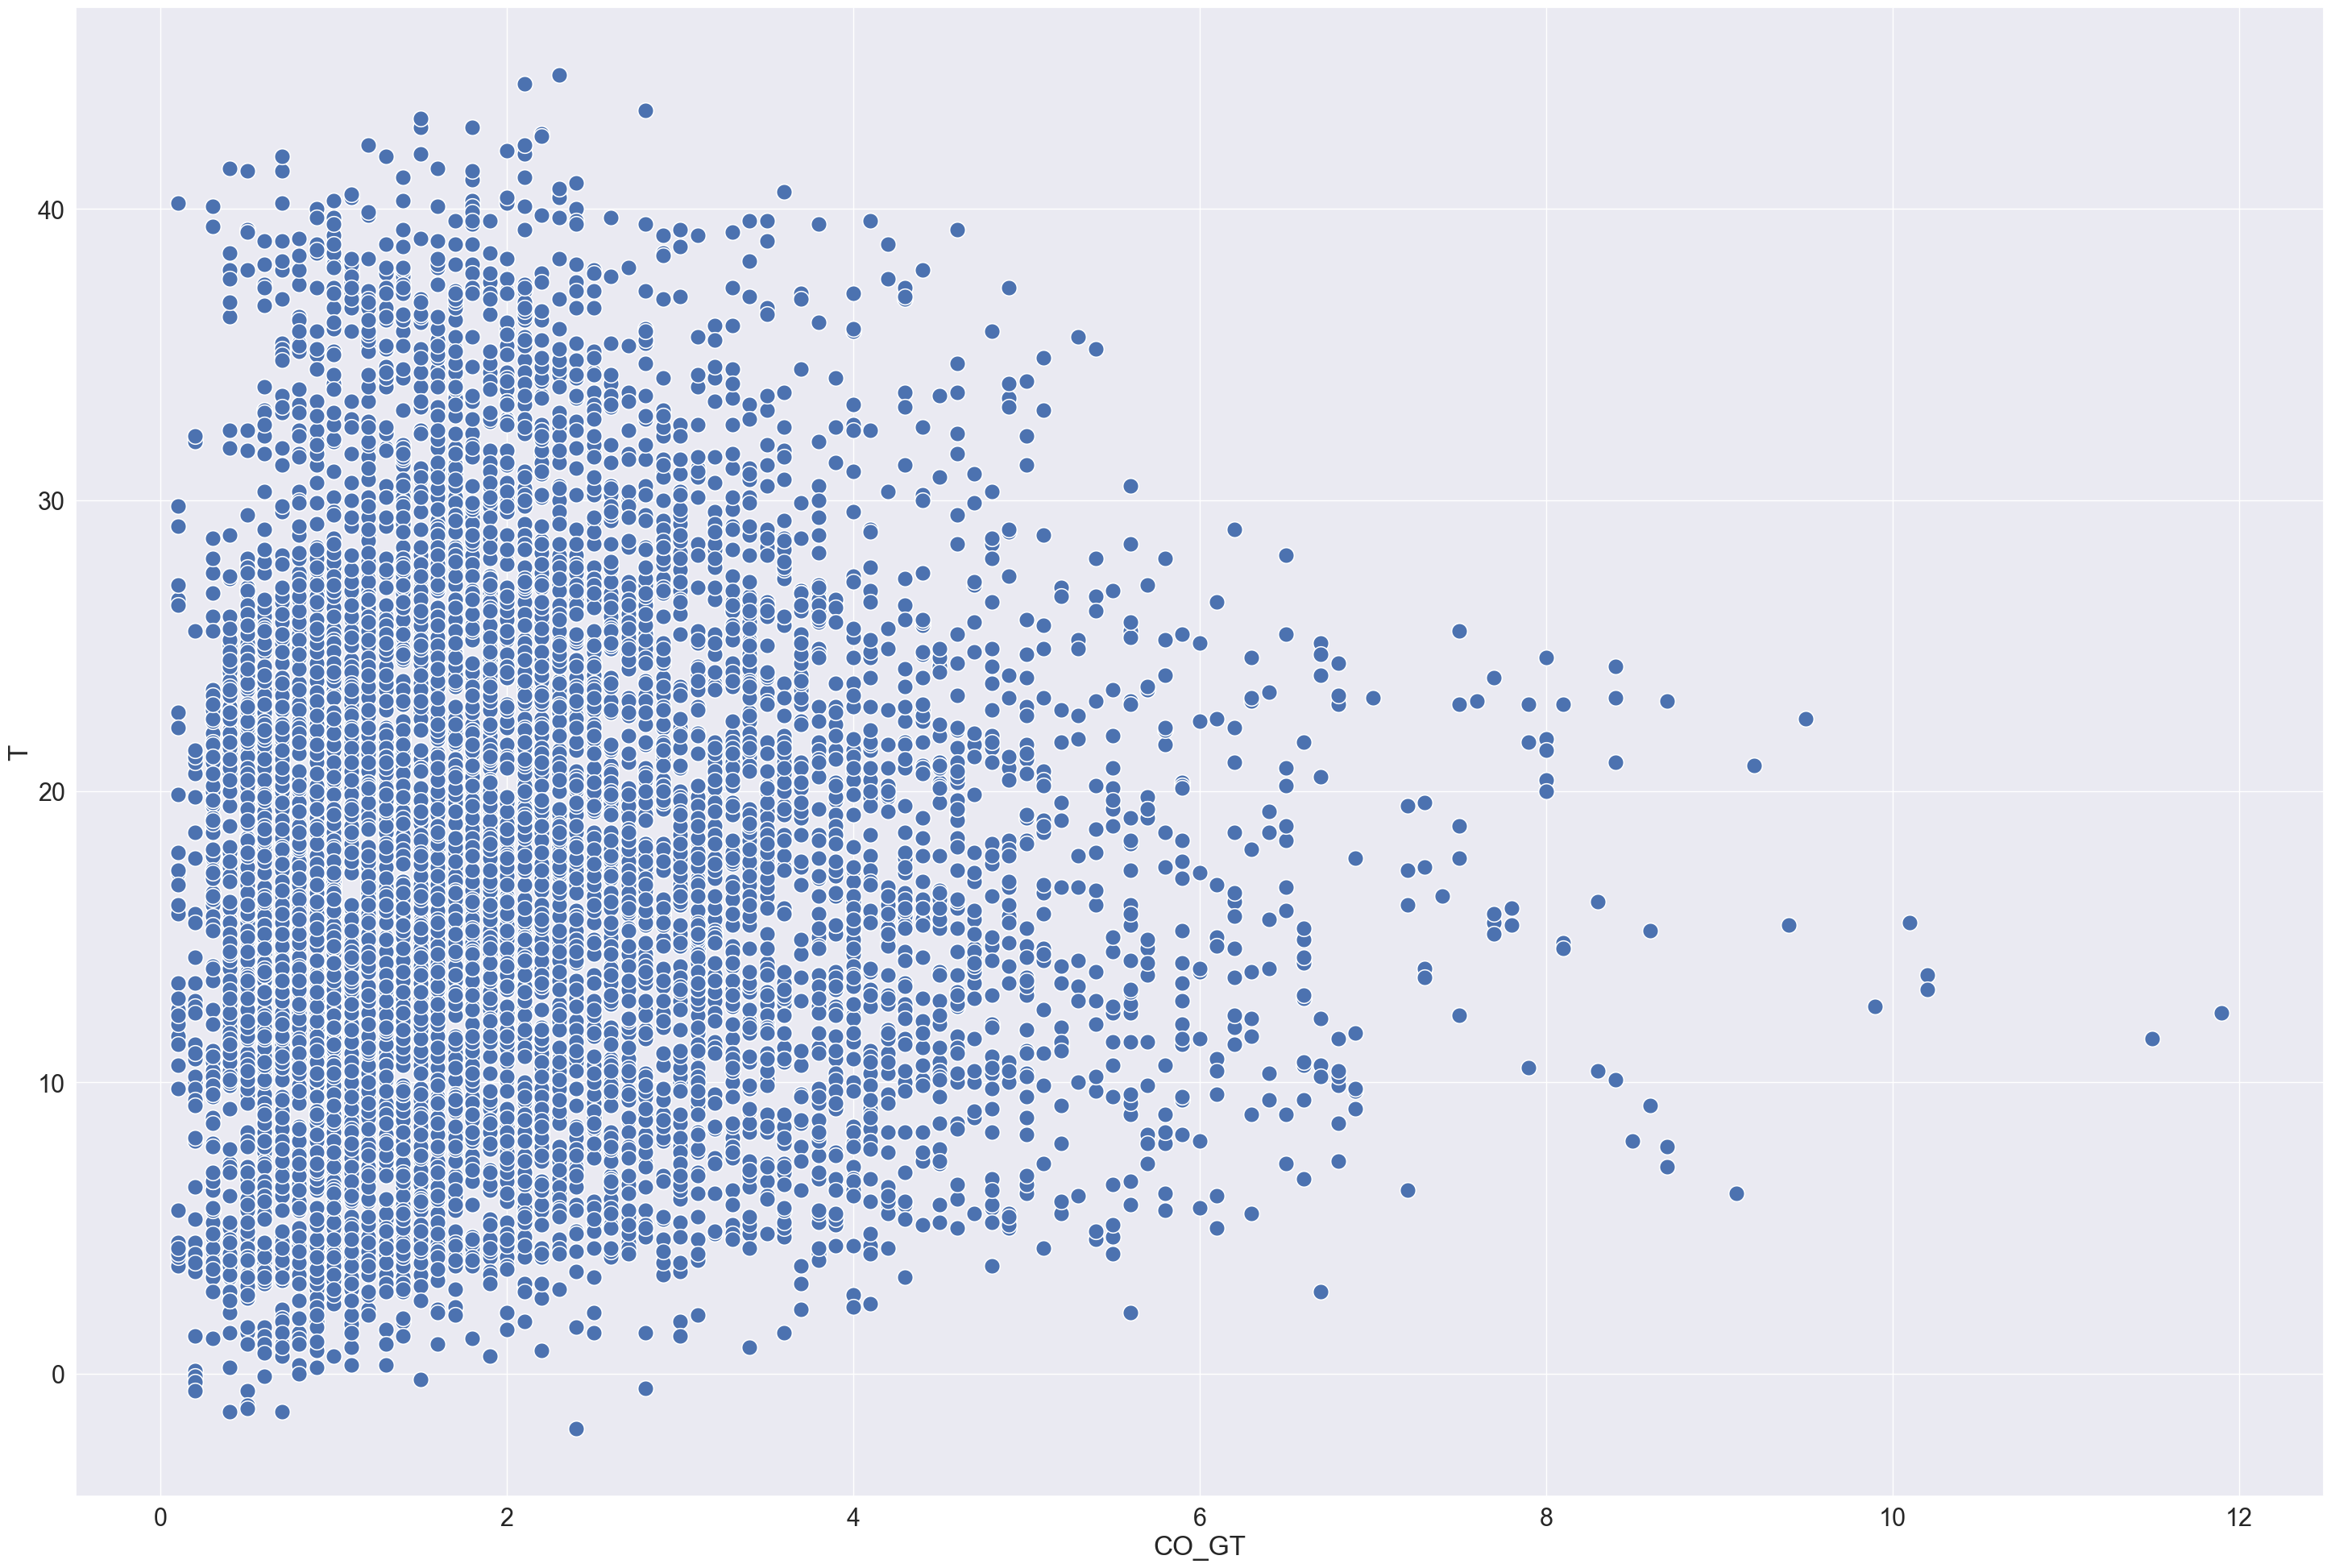

In [14]:
plt.figure(figsize=(36,24))
sns.scatterplot(x     = 'CO_GT',
                y     = 'T',
                # hue   = 'categorie', 
                data  = donnees,
                s     = 200,
                palette= palette,
                );

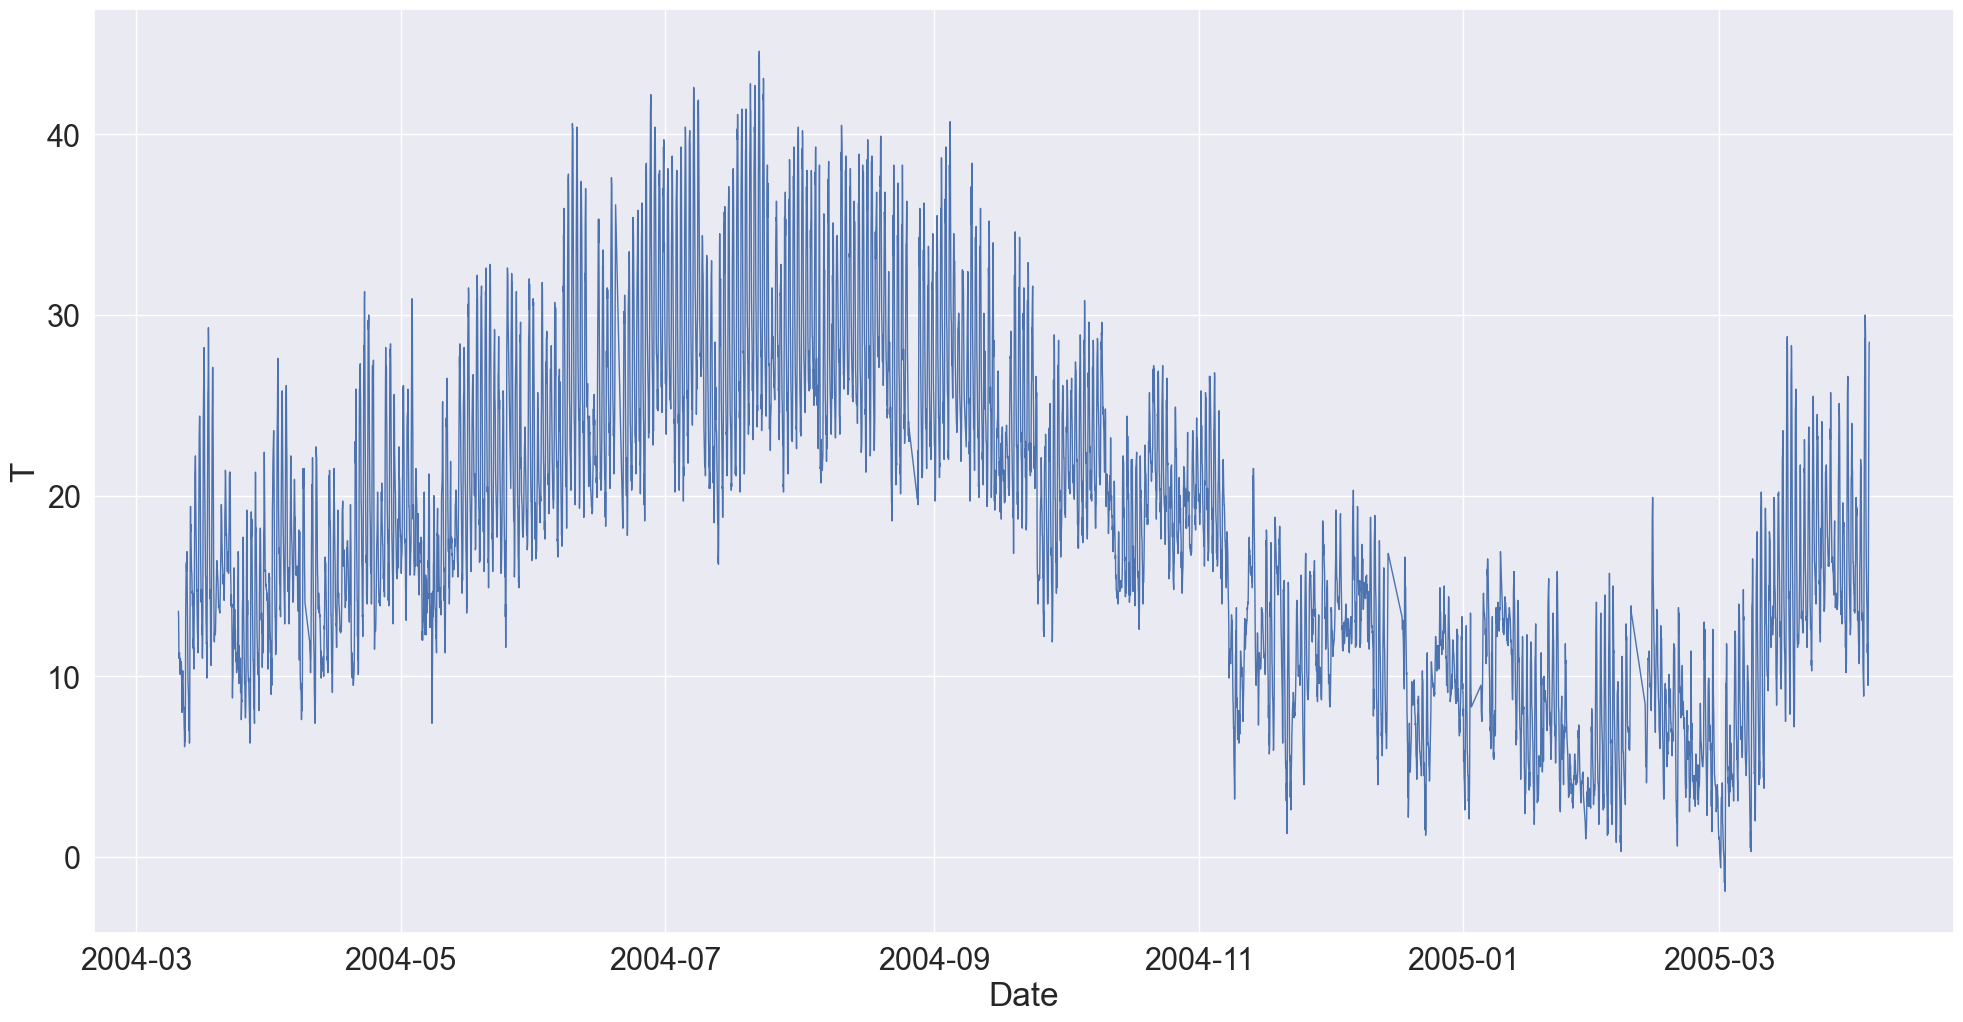

In [15]:
plt.figure(figsize=(24,12))

ax = sns.lineplot(x  =donnees.index,
                  y  ='T',
                  # hue='annee',             
                  data=donnees, 
                  estimator=None, 
                  lw=1, 
                  ci=None, 
                  palette= palette);
# ax.set_xticklabels(d.pays,rotation=90);